In [1]:
from sklearn.datasets import load_diabetes

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

C:\Users\hpcod\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
data = load_diabetes()

In [3]:
df = pd.DataFrame(data.data,columns=data.feature_names)
df['TARGET'] = data.target


In [4]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,TARGET
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [5]:
df.shape

(442, 11)

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(data.data,data.target,test_size=0.2,random_state=2)

In [7]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score

In [8]:
coefs = []
r2_scores = []

for i in [0,10,100,1000]:
    reg = Ridge(alpha=i)
    reg.fit(X_train,y_train)
    
    coefs.append(reg.coef_.tolist())
    y_pred = reg.predict(X_test)
    r2_scores.append(r2_score(y_test,y_pred))

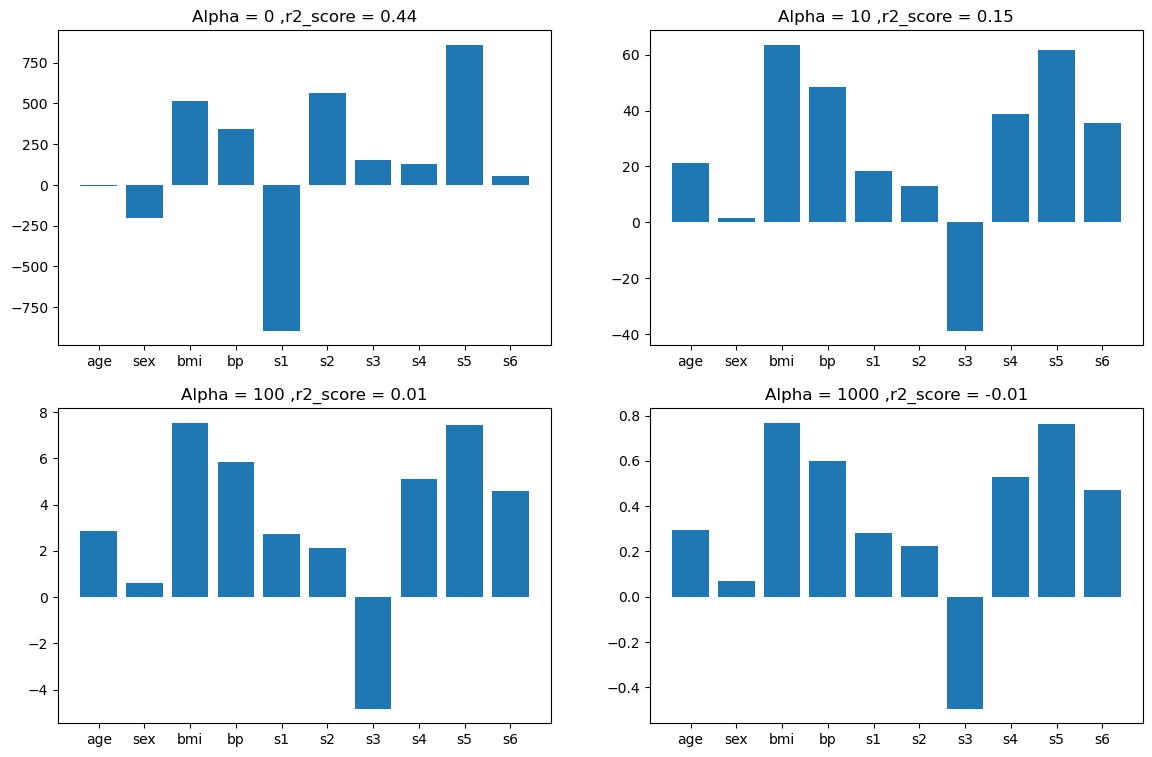

In [9]:
plt.figure(figsize=(14,9))
plt.subplot(221)
plt.bar(data.feature_names,coefs[0])
plt.title('Alpha = 0 ,r2_score = {}'.format(round(r2_scores[0],2)))

plt.subplot(222)
plt.bar(data.feature_names,coefs[1])
plt.title('Alpha = 10 ,r2_score = {}'.format(round(r2_scores[1],2)))

plt.subplot(223)
plt.bar(data.feature_names,coefs[2])
plt.title('Alpha = 100 ,r2_score = {}'.format(round(r2_scores[2],2)))

plt.subplot(224)
plt.bar(data.feature_names,coefs[3])
plt.title('Alpha = 1000 ,r2_score = {}'.format(round(r2_scores[3],2)))

plt.show()

In [10]:
alphas = [0,0.0001,0.001,0.01,0.1,1,10,100,1000,10000]

coefs = []

for i in alphas:
    reg = Ridge(alpha=i)
    reg.fit(X_train,y_train)
    
    coefs.append(reg.coef_.tolist())

In [11]:
input_array = np.array(coefs)

In [12]:
coef_df = pd.DataFrame(input_array,columns=data.feature_names)
coef_df['alpha'] = alphas
coef_df.set_index('alpha')

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
alpha,,,,,,,,,,
0.0000,-9.158653,-205.454322,516.693745,340.619999,-895.552002,561.220679,153.893110,126.731397,861.127002,52.421122
0.0001,-9.116119,-205.329219,516.889664,340.549436,-883.423872,551.559582,148.587063,125.353015,856.485935,52.468916
0.0010,-8.761487,-204.313404,518.380608,339.967926,-787.700510,475.282181,106.795253,114.629265,819.745723,52.873349
0.0100,-6.399507,-198.662945,522.056516,336.340595,-383.717571,152.670882,-66.053243,75.608209,659.875219,55.829221
0.1000,6.643733,-172.237474,485.529585,314.675846,-72.940209,-80.588688,-174.463527,83.614710,484.365316,73.585091
1.0000,42.242528,-57.304483,282.172125,198.059395,14.363734,-22.551079,-136.929684,102.023069,260.104294,98.552692
10.0000,21.174024,1.659837,63.659826,48.492858,18.421510,12.875466,-38.915435,38.842475,61.612302,35.505383
100.0000,2.858980,0.629453,7.540605,5.849949,2.710879,2.142135,-4.834047,5.108223,7.448451,4.576129
1000.0000,0.295726,0.069290,0.769004,0.597824,0.282900,0.225936,-0.495607,0.527031,0.761496,0.471029


In [13]:
alphas = [0,0.0001,0.0005,0.001,0.005,0.1,0.5,1,5,10]

coefs = []

for i in alphas:
    reg = Ridge(alpha=i)
    reg.fit(X_train,y_train)
    
    coefs.append(reg.coef_.tolist())

In [14]:
input_array = np.array(coefs).T

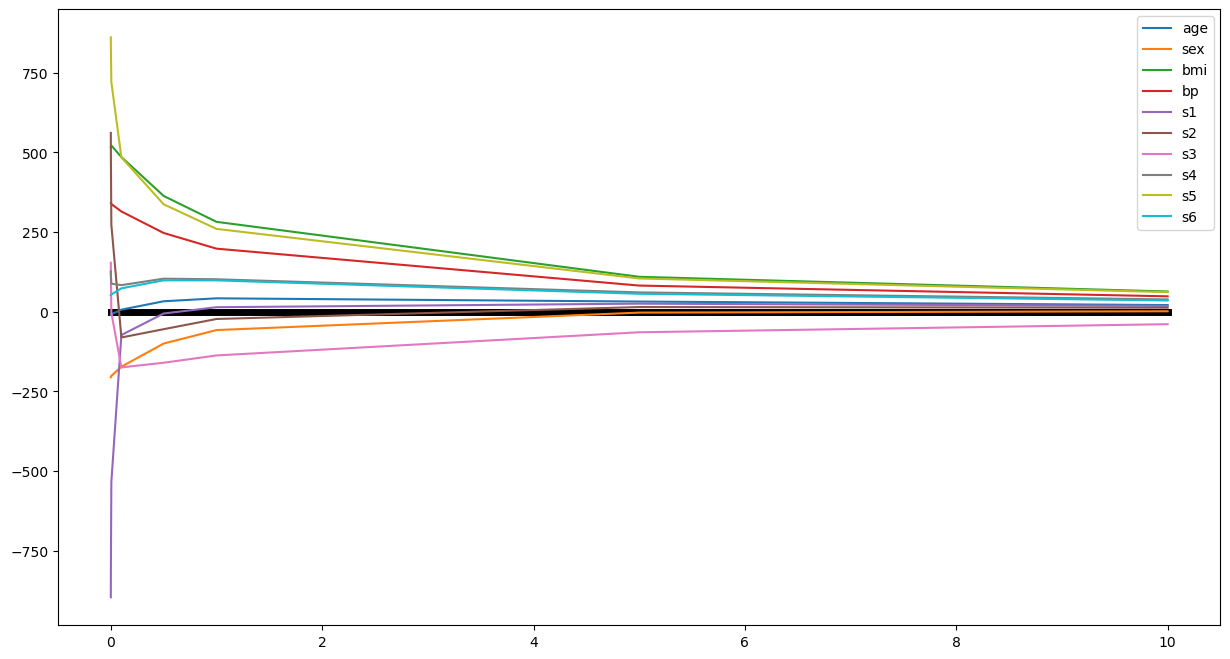

In [15]:
plt.figure(figsize=(15,8))
plt.plot(alphas,np.zeros(len(alphas)),color='black',linewidth=5)
for i in range(input_array.shape[0]):
    plt.plot(alphas,input_array[i],label=data.feature_names[i])
plt.legend()

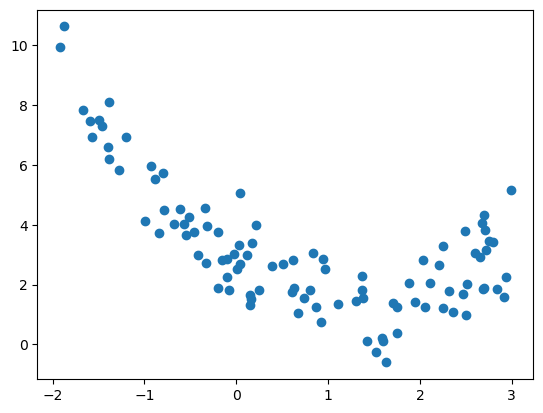

In [16]:
m = 100
X = 5 * np.random.rand(m, 1) - 2
y = 0.7 * X ** 2 - 2 * X + 3 + np.random.randn(m, 1)

plt.scatter(X, y)
plt.show()

In [17]:
X_train,X_test,y_train,y_test = train_test_split(X.reshape(100,1),y.reshape(100),test_size=0.2,random_state=2)

In [18]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=15)

X_train = poly.fit_transform(X_train)
X_test = poly.transform(X_test)

In [ ]:
from mlxtend.evaluate import bias_variance_decomp

alphas = np.linspace(0,30,100)


loss = []
bias = []
variance = []

for i in alphas:
    reg = Ridge(alpha=i)
    avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
        reg, X_train, y_train, X_test, y_test, 
        loss='mse',
        random_seed=123)
    loss.append(avg_expected_loss)
    bias.append(avg_bias)
    variance.append(avg_var)

In [ ]:
plt.plot(alphas,loss,label='loss')
plt.plot(alphas,bias,label='Bias')
plt.plot(alphas,variance,label='Variance')
plt.ylim(0,5)
plt.xlabel('Alpha')
plt.legend()

In [ ]:
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from mlxtend.evaluate import bias_variance_decomp

# Sample data
X, y = np.arange(10).reshape((5, 2)), range(5)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

# Define the model
model = Ridge(alpha=1.0)

# Bias-variance decomposition
avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
    model, X_train, y_train, X_test, y_test, loss='mse', num_rounds=200, random_seed=123)

print(f'Average expected loss: {avg_expected_loss:.3f}')
print(f'Average bias: {avg_bias:.3f}')
print(f'Average variance: {avg_var:.3f}')


In [23]:
!pip install mlxtend


Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for mlxtend from https://files.pythonhosted.org/packages/1c/07/512f6a780239ad6ce06ce2aa7b4067583f5ddcfc7703a964a082c706a070/mlxtend-0.23.1-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   --- ------------------------------------ 0.1/1.4 MB 2.2 MB/s eta 0:00:01
   ---------- ----------------------------- 0.4/1.4 MB 4.6 MB/s eta 0:00:01
   ---------------------- ----------------- 0.8/1.4 MB 7.5 MB/s eta 0:00:01
   ---------------------------------------- 1.4/1.4 MB 9.2 MB/s eta 0:00:00


[27.82809103]
-2.29474455867698


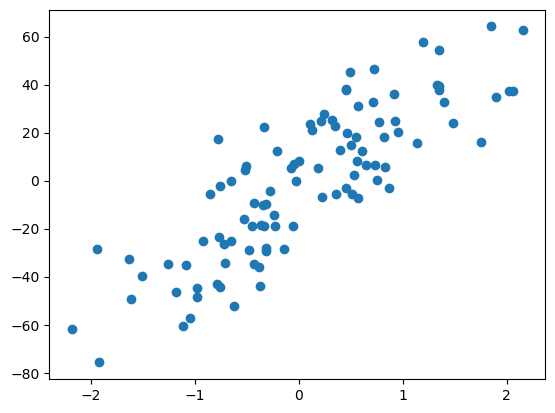

In [33]:
from sklearn.datasets import make_regression

X,y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1,noise=20,random_state=13)

plt.scatter(X,y)

from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X,y)
print(reg.coef_)
print(reg.intercept_)

In [29]:
# Install mlxtend (if not already installed)
!pip install mlxtend

# Import required libraries
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from mlxtend.evaluate import bias_variance_decomp

# Sample data
X = np.array([[1, 2], [3, 4], [5, 6]])
y = np.array([1, 2, 3])

# Ensure the data is in the form of NumPy arrays
X = np.array(X)
y = np.array(y)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Define the model
model = Ridge(alpha=1.0)

# Perform bias-variance decomposition
avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
    model, X_train, y_train, X_test, y_test, loss='mse', num_rounds=200, random_seed=123)

print(f'Average expected loss: {avg_expected_loss:.3f}')
print(f'Average bias: {avg_bias:.3f}')
print(f'Average variance: {avg_var:.3f}')


Defaulting to user installation because normal site-packages is not writeable
Average expected loss: 2.500
Average bias: 2.500
Average variance: 0.000


In [30]:
X = np.array(X)
y = np.array(y)


In [37]:
# Install mlxtend (if not already installed)
!pip install mlxtend

# Import required libraries
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from mlxtend.evaluate import bias_variance_decomp

# Sample data
X = np.array([[1, 2], [3, 4], [5, 6], [7, 8], [9, 10]])
y = np.array([1, 2, 3, 4, 5])

# Ensure the data is in the form of NumPy arrays
X = np.array(X)
y = np.array(y)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Alphas for Ridge regression
alphas = np.linspace(0, 30, 100)

# Lists to store results
loss = []
bias = []
variance = []

# Loop through alphas and perform bias-variance decomposition
for alpha in alphas:
    reg = Ridge(alpha=alpha)
    avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
        reg, X_train, y_train, X_test, y_test, 
        loss='mse',
        random_seed=123
    )
    loss.append(avg_expected_loss)
    bias.append(avg_bias)
    variance.append(avg_var)

# Print results (or you could plot them)
print("Loss:", loss)
print("Bias:", bias)
print("Variance:", variance)


Defaulting to user installation because normal site-packages is not writeable
Loss: [2.085, 2.0850815215119245, 2.0853207096179993, 2.0857097964036986, 2.0862413924816177, 2.086908466675888, 2.087704326923077, 2.088622602308659, 2.0896572261640576, 2.0908024201547315, 2.09205267929478, 2.09340275782821, 2.0948476559212192, 2.0963826071138274, 2.0980030664827987, 2.0997046994711335, 2.101483371342532, 2.1033351372220688, 2.1052562326869806, 2.1072430648738947, 2.1092922040711244, 2.1114003757667295, 2.113564453125, 2.1157814498658194, 2.118048513523056, 2.1203629190596582, 2.1227220628185957, 2.1251234567901234, 2.1275647231770964, 2.1300435892412124, 2.1325578824141522, 2.1351055256586, 2.1376845330650327, 2.140293005671077, 2.142929127491023, 2.1455911617438415, 2.148277447268794, 2.1509863951183257, 2.153716485318617, 2.1564662637886913, 2.1592343394095512, 2.1620193812353055, 2.1648201158387166, 2.167635324784066, 2.170463842220599, 2.1733045525902663, 2.1761563884437742, 2.17901832

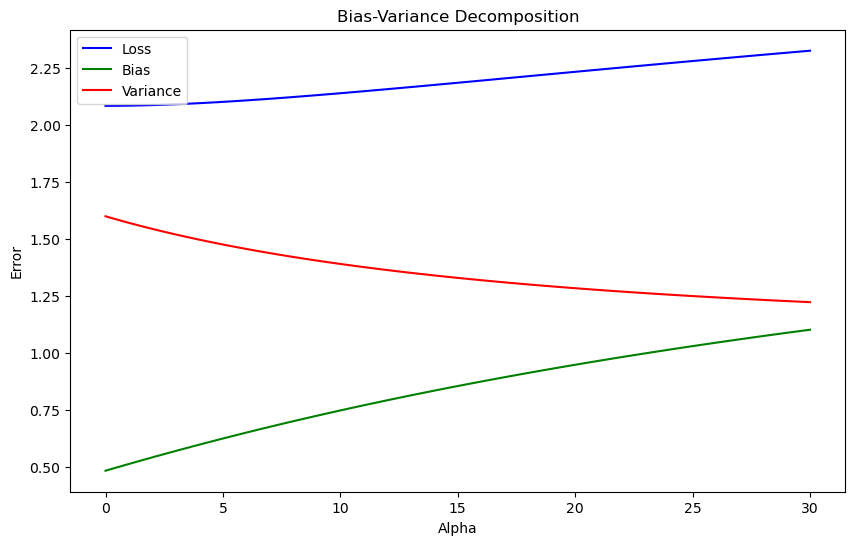

In [38]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(alphas, loss, label='Loss', color='blue')
plt.plot(alphas, bias, label='Bias', color='green')
plt.plot(alphas, variance, label='Variance', color='red')
plt.xlabel('Alpha')
plt.ylabel('Error')
plt.title('Bias-Variance Decomposition')
plt.legend()
plt.show()


In [39]:
def cal_loss(m,alpha):
    return np.sum((y - m*X.ravel() + 2.29)**2) + alpha*m*m

In [40]:
def predict(m):
    return m*X - 2.29

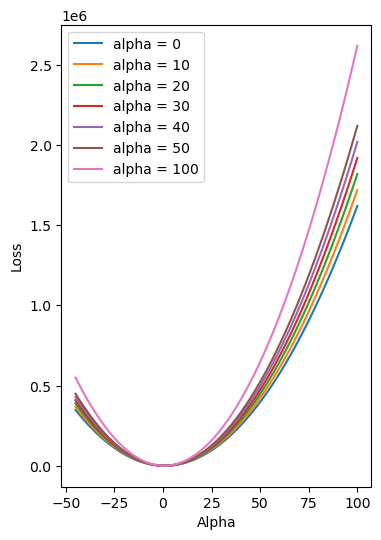

In [44]:
m = np.linspace(-45,100,100)
plt.figure(figsize=(4,6))
for j in [0,10,20,30,40,50,100]:
    loss = []
    for i in range(m.shape[0]):
        loss_i = cal_loss(m[i],j)
        loss.append(loss_i)
    plt.plot(m,loss,label='alpha = {}'.format(j))
plt.legend()
plt.xlabel('Alpha')
plt.ylabel('Loss')
plt.show()

Defaulting to user installation because normal site-packages is not writeable


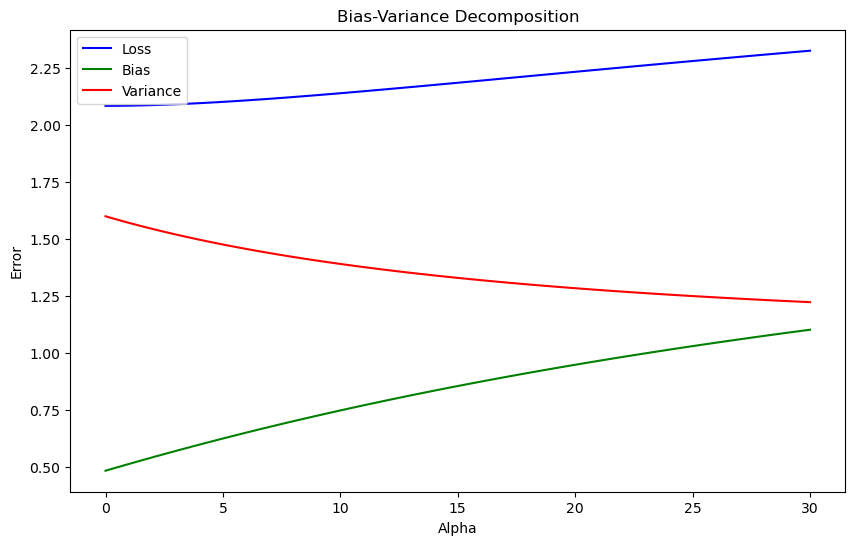

In [49]:
# Install mlxtend (if not already installed)
!pip install mlxtend

# Import required libraries
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from mlxtend.evaluate import bias_variance_decomp
import matplotlib.pyplot as plt

# Sample data
X = np.array([[1, 2], [3, 4], [5, 6], [7, 8], [9, 10]])
y = np.array([1, 2, 3, 4, 5])

# Ensure the data is in the form of NumPy arrays
X = np.array(X)
y = np.array(y)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Ensure the split data is in the form of NumPy arrays
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

# Alphas for Ridge regression
alphas = np.linspace(0, 30, 100)

# Lists to store results
loss = []
bias = []
variance = []

# Loop through alphas and perform bias-variance decomposition
for alpha in alphas:
    reg = Ridge(alpha=alpha)
    avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
        reg, X_train, y_train, X_test, y_test, 
        loss='mse',
        random_seed=123
    )
    loss.append(avg_expected_loss)
    bias.append(avg_bias)
    variance.append(avg_var)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(alphas, loss, label='Loss', color='blue')
plt.plot(alphas, bias, label='Bias', color='green')
plt.plot(alphas, variance, label='Variance', color='red')
plt.xlabel('Alpha')
plt.ylabel('Error')
plt.title('Bias-Variance Decomposition')
plt.legend()
plt.show()


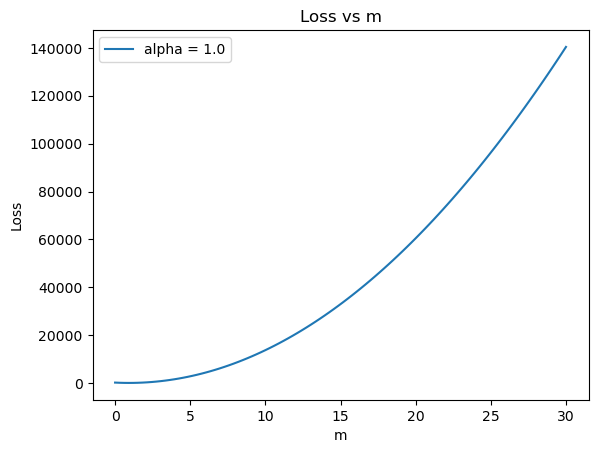

In [43]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data
X = np.array([[1, 2], [3, 4], [5, 6], [7, 8], [9, 10]])
y = np.array([1, 2, 3, 4, 5])

# Ensure the data is in the form of NumPy arrays
X = np.array(X)
y = np.array(y)

# Function to calculate loss
def cal_loss(m, alpha):
    # Ensure m is a scalar
    return np.sum((y - m * X[:, 0] + 2.29)**2) + alpha * m * m

# Example range for m and alpha
m_values = np.linspace(0, 30, 100)
alpha = 1.0

# Calculate loss for each m
loss = [cal_loss(m, alpha) for m in m_values]

# Plot the results
plt.plot(m_values, loss, label=f'alpha = {alpha}')
plt.xlabel('m')
plt.ylabel('Loss')
plt.title('Loss vs m')
plt.legend()
plt.show()


Defaulting to user installation because normal site-packages is not writeable
Length of alphas: 100
Length of loss: 100
Length of bias: 100
Length of variance: 100


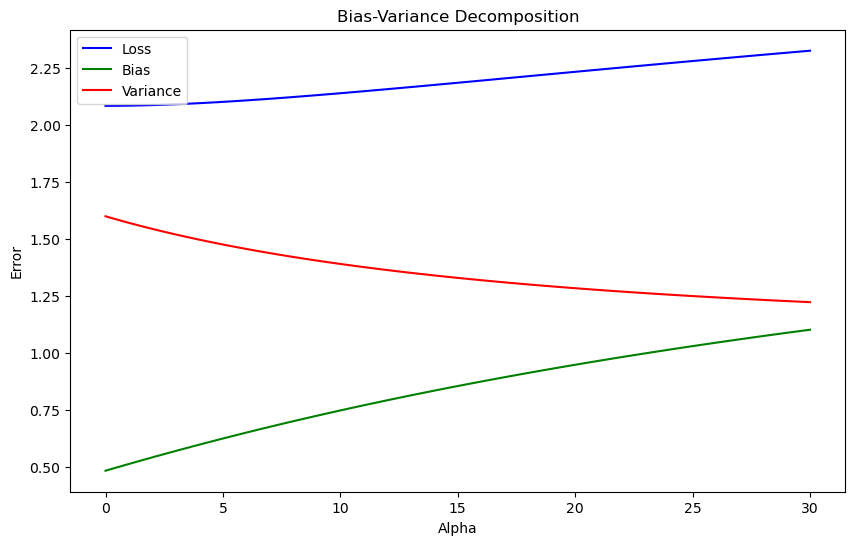

In [60]:
# Install mlxtend (if not already installed)
!pip install mlxtend

# Import required libraries
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from mlxtend.evaluate import bias_variance_decomp
import matplotlib.pyplot as plt

# Sample data
X = np.array([[1, 2], [3, 4], [5, 6], [7, 8], [9, 10]])
y = np.array([1, 2, 3, 4, 5])

# Ensure the data is in the form of NumPy arrays
X = np.array(X)
y = np.array(y)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Ensure the split data is in the form of NumPy arrays
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

# Alphas for Ridge regression
alphas = np.linspace(0, 30, 100)

# Lists to store results
loss = []
bias = []
variance = []

# Loop through alphas and perform bias-variance decomposition
for alpha in alphas:
    try:
        reg = Ridge(alpha=alpha)
        avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
            reg, X_train, y_train, X_test, y_test, 
            loss='mse',
            random_seed=123
        )
        loss.append(avg_expected_loss)
        bias.append(avg_bias)
        variance.append(avg_var)
    except Exception as e:
        print(f"Error with alpha {alpha}: {e}")
        # Ensure that we add a default value in case of an error to keep list lengths consistent
        loss.append(np.nan)
        bias.append(np.nan)
        variance.append(np.nan)

# Check lengths of lists to debug the ValueError
print(f"Length of alphas: {len(alphas)}")
print(f"Length of loss: {len(loss)}")
print(f"Length of bias: {len(bias)}")
print(f"Length of variance: {len(variance)}")

# Plot the results only if lists are of correct lengths
if len(alphas) == len(loss) == len(bias) == len(variance):
    plt.figure(figsize=(10, 6))
    plt.plot(alphas, loss, label='Loss', color='blue')
    plt.plot(alphas, bias, label='Bias', color='green')
    plt.plot(alphas, variance, label='Variance', color='red')
    plt.xlabel('Alpha')
    plt.ylabel('Error')
    plt.title('Bias-Variance Decomposition')
    plt.legend()
    plt.show()
else:
    print("Error: The lengths of alphas and results lists are not consistent.")
